In [4]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

In [5]:
#Leer el archivo CSV.
df = pd.read_csv('JPMaQS_Quantamental_Indicators.csv')


In [6]:
# Eliminar columna que no necesitamos
df = df.drop(columns=['Unnamed: 0'])


In [7]:
# Corregir tipos de datos (fechas)
df["real_date"] = pd.to_datetime(df["real_date"])


In [8]:
# Verificar estructura de datos
print(df.dtypes)
print(df.columns.tolist())


real_date    datetime64[ns]
cid                  object
xcat                 object
value               float64
grading             float64
eop_lag             float64
mop_lag             float64
dtype: object
['real_date', 'cid', 'xcat', 'value', 'grading', 'eop_lag', 'mop_lag']


In [9]:
# Verificar el rango de fechas por moneda
currency_dates = df.groupby("cid")["real_date"].agg(["min", "max"])


In [10]:
# Revisar valores faltantes
print(df.isna().sum())

# Revisar si hay duplicados
print(f"Duplicados: {df.duplicated().sum()} filas duplicadas")



real_date    0
cid          0
xcat         0
value        0
grading      0
eop_lag      0
mop_lag      0
dtype: int64
Duplicados: 0 filas duplicadas


In [11]:
# Crear la columna ticker
df["ticker"] = df["cid"] + "_" + df["xcat"]


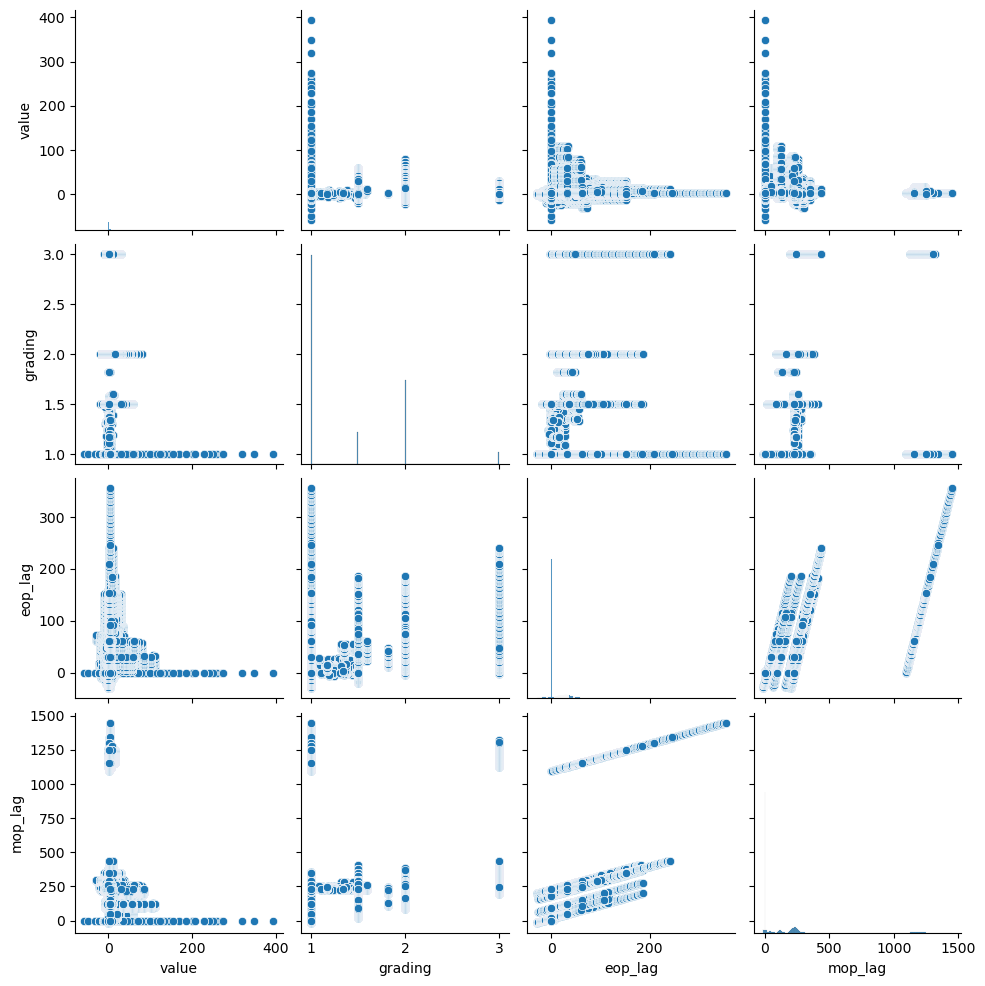

In [12]:
#pairplot
sns.pairplot(df[["value", "grading", "eop_lag", "mop_lag"]])
plt.show()

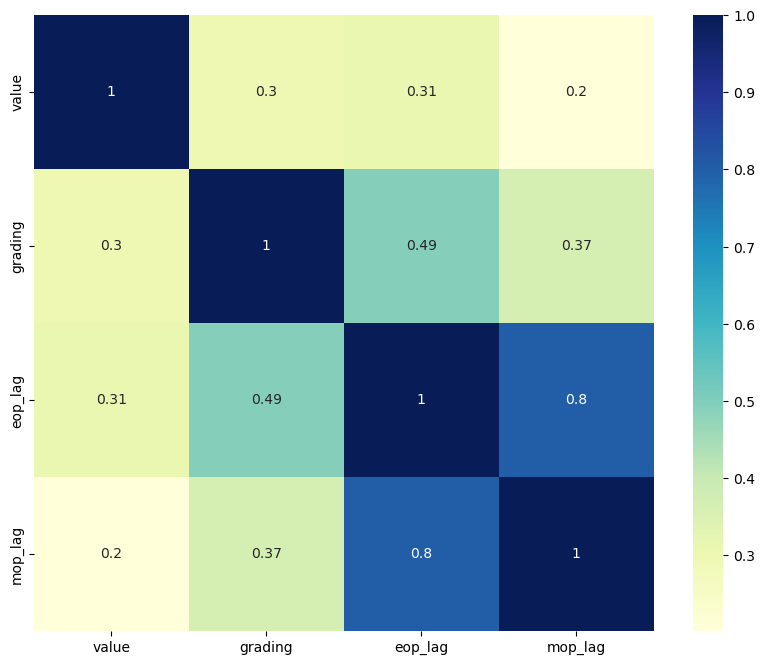

In [13]:
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[["value", "grading", "eop_lag", "mop_lag"]].corr(), annot=True, cmap="YlGnBu")
plt.show()


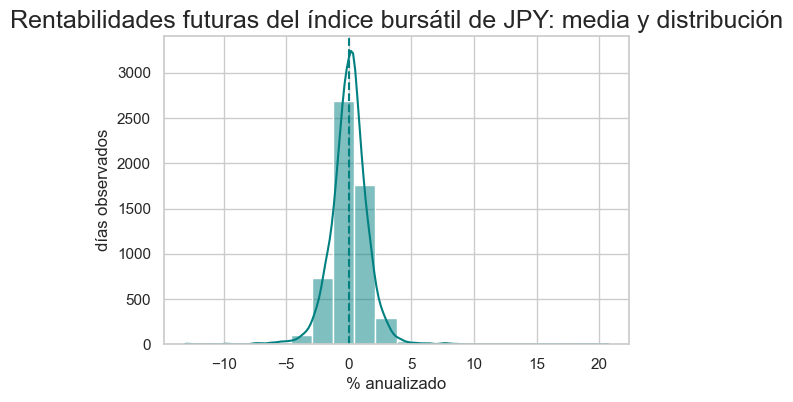

In [14]:
#JPY – Rentabilidades futuras del índice bursátil
dfw = df.pivot_table(index='real_date', columns='ticker', values='value').replace(0, np.nan)

var = 'JPY_EQXR_NSA'

col = 'teal'
sns.set_theme(style='whitegrid', rc={'figure.figsize': (6, 4)})
sns.histplot(x=var, data=dfw, bins=20, kde=True, color=col)
plt.axvline(x=np.mean(dfw[var]), color=col, linestyle='--')

plt.title('Rentabilidades futuras del índice bursátil de JPY: media y distribución', fontsize=18)
plt.xlabel('% anualizado', fontsize=12)
plt.ylabel('días observados', fontsize=12)
plt.show()

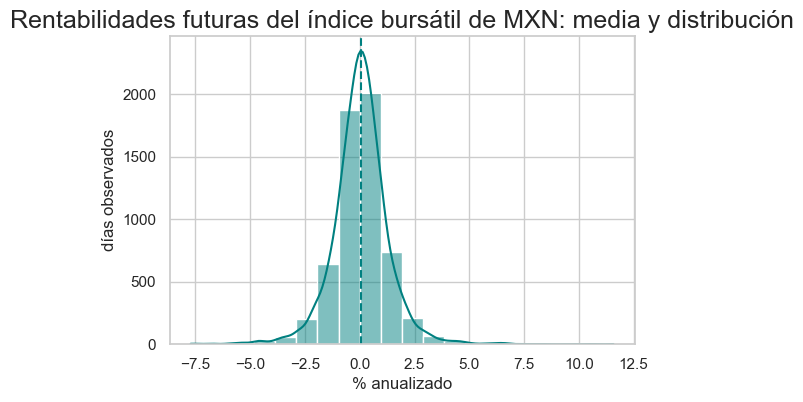

In [15]:
#MXN – Rentabilidades futuras del índice bursátil
var = 'MXN_EQXR_NSA'

sns.set_theme(style='whitegrid', rc={'figure.figsize': (6, 4)})
sns.histplot(x=var, data=dfw, bins=20, kde=True, color=col)
plt.axvline(x=np.mean(dfw[var]), color=col, linestyle='--')

plt.title('Rentabilidades futuras del índice bursátil de MXN: media y distribución', fontsize=18)
plt.xlabel('% anualizado', fontsize=12)
plt.ylabel('días observados', fontsize=12)
plt.show()


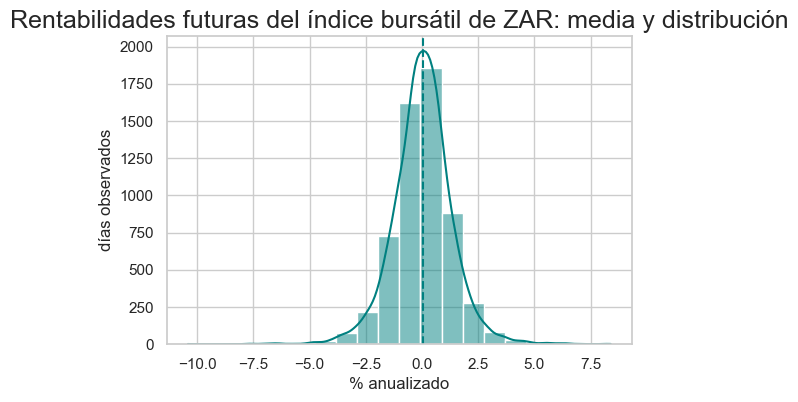

In [16]:
# ZAR – Rentabilidades futuras del índice bursátil
var = 'ZAR_EQXR_NSA'

sns.set_theme(style='whitegrid', rc={'figure.figsize': (6, 4)})
sns.histplot(x=var, data=dfw, bins=20, kde=True, color=col)
plt.axvline(x=np.mean(dfw[var]), color=col, linestyle='--')

plt.title('Rentabilidades futuras del índice bursátil de ZAR: media y distribución', fontsize=18)
plt.xlabel('% anualizado', fontsize=12)
plt.ylabel('días observados', fontsize=12)
plt.show()


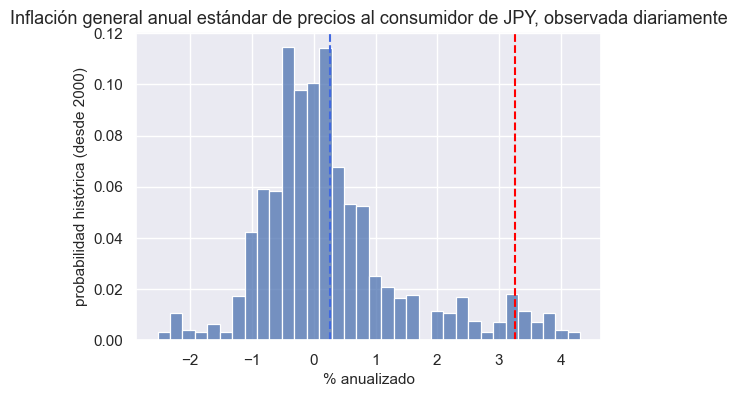

In [17]:
#JPY – Inflación general anual
var = 'JPY_CPIH_SA_P1M1ML12'

col = 'royalblue'
sns.set_theme(style='darkgrid', rc={'figure.figsize': (6, 4)})
sns.histplot(x=var, data=dfw, binwidth=0.2, stat='probability')
plt.axvline(x=np.mean(dfw[var]), color=col, linestyle='--')
plt.axvline(x=dfw[var].dropna().iloc[-1], color='red', linestyle='--')

plt.title('Inflación general anual estándar de precios al consumidor de JPY, observada diariamente', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('probabilidad histórica (desde 2000)', fontsize=11)
plt.show()

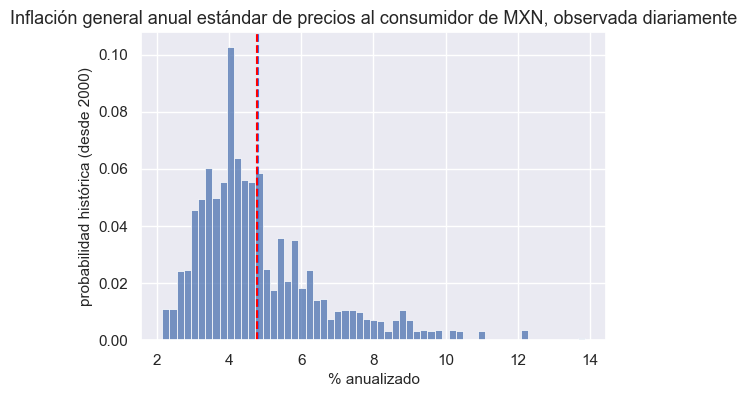

In [18]:
#MXN – Inflación general anual
var = 'MXN_CPIH_SA_P1M1ML12'

sns.set_theme(style='darkgrid', rc={'figure.figsize': (6, 4)})
sns.histplot(x=var, data=dfw, binwidth=0.2, stat='probability')
plt.axvline(x=np.mean(dfw[var]), color=col, linestyle='--')
plt.axvline(x=dfw[var].dropna().iloc[-1], color='red', linestyle='--')

plt.title('Inflación general anual estándar de precios al consumidor de MXN, observada diariamente', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('probabilidad histórica (desde 2000)', fontsize=11)
plt.show()



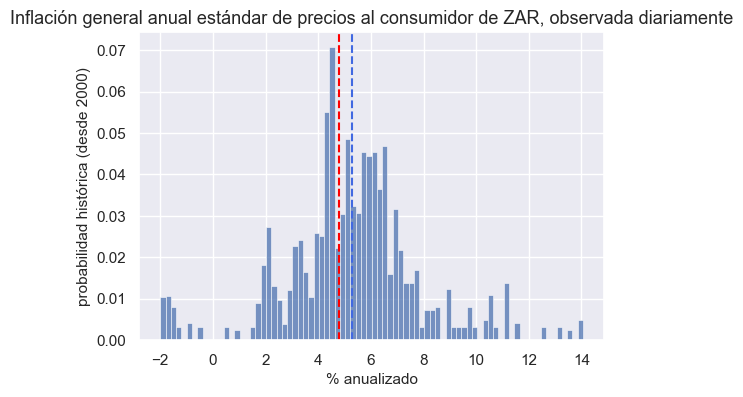

In [19]:
#ZAR – Inflación general anual
var = 'ZAR_CPIH_SA_P1M1ML12'

sns.set_theme(style='darkgrid', rc={'figure.figsize': (6, 4)})
sns.histplot(x=var, data=dfw, binwidth=0.2, stat='probability')
plt.axvline(x=np.mean(dfw[var]), color=col, linestyle='--')
plt.axvline(x=dfw[var].dropna().iloc[-1], color='red', linestyle='--')

plt.title('Inflación general anual estándar de precios al consumidor de ZAR, observada diariamente', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('probabilidad histórica (desde 2000)', fontsize=11)
plt.show()



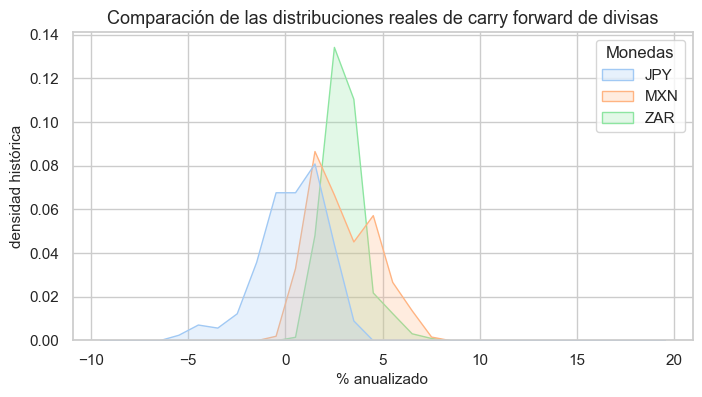

In [20]:
#Carry forward real de divisas - Comparacion
cids_sel = ['JPY', 'MXN', 'ZAR']
filt1 = df['xcat'] == 'FXCRR_NSA'
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')

dfx = df[filt1 & filt2 & filt3][['value', 'cid']].replace(0, np.nan)

colors = 'pastel'
sns.set_theme(style='whitegrid', rc={'figure.figsize': (8, 4)})
ax = sns.histplot(
    x='value', data=dfx,
    hue='cid', element='poly', multiple='layer',
    binrange=(-10, 20), binwidth=1, stat='density', palette=colors
)
plt.title('Comparación de las distribuciones reales de carry forward de divisas', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('densidad histórica', fontsize=11)
ax.get_legend().set_title('Monedas')
plt.show()

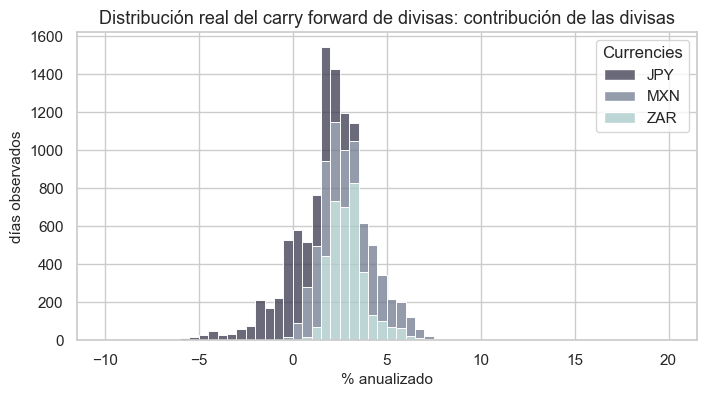

In [21]:
#Distribución real del carry forward
colors = 'bone'
sns.set_theme(style='whitegrid', rc={'figure.figsize': (8, 4)})
ax = sns.histplot(x='value', data=dfx,
                  hue='cid', element='bars', multiple='stack',
                  binrange=(-10, 20), binwidth=0.5,
                  stat='count', palette=colors)

plt.title('Distribución real del carry forward de divisas: contribución de las divisas', fontsize=13)
plt.xlabel('% anualizado', fontsize=11)
plt.ylabel('días observados', fontsize=11)
leg = ax.axes.get_legend()
leg.set_title('Currencies')
plt.show()


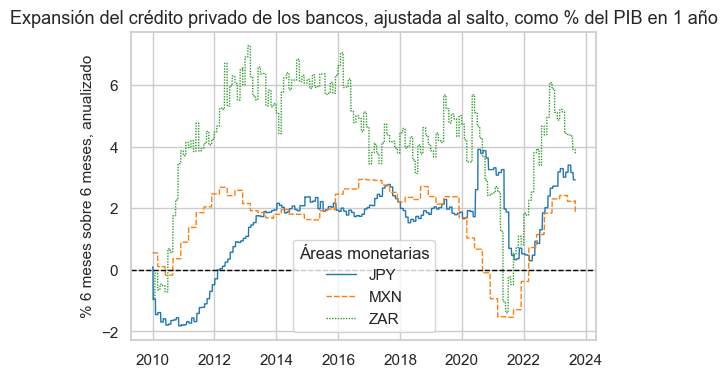

In [22]:
#Expansión del crédito privado como % del PIB (ajustada al salto)

cids_sel = ['JPY', 'MXN', 'ZAR']
filt1 = df['xcat'] == 'PCREDITGDP_SJA_D1M1ML12'
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')

dfx = df[filt1 & filt2 & filt3]
dfw = dfx.pivot(index='real_date', columns='cid', values='value')

colors = 'tab10'
sns.set_theme(style='whitegrid', rc={'figure.figsize': (6, 4)})
ax = sns.lineplot(data=dfw, estimator=None, palette=colors, linewidth=1)

plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Expansión del crédito privado de los bancos, ajustada al salto, como % del PIB en 1 año', fontsize=13)
plt.xlabel('')
plt.ylabel('% 6 meses sobre 6 meses, anualizado', fontsize=11)

leg = ax.axes.get_legend()
leg.set_title('Áreas monetarias')

plt.show()


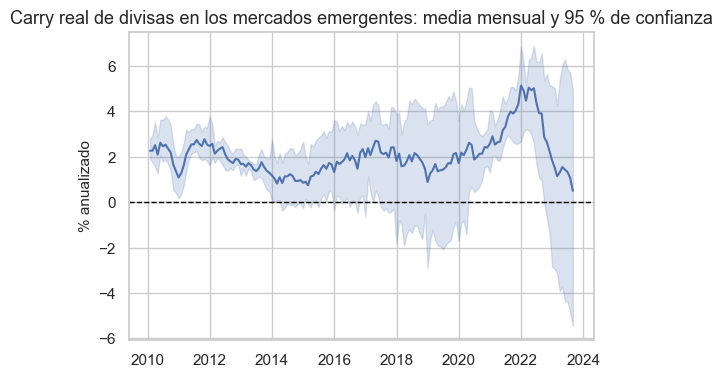

In [23]:
#Carry real de divisas (promedio mensual + IC 95%)

cids_sel = ['JPY', 'MXN', 'ZAR']
filt1 = df['xcat'] == 'FXCRR_NSA'
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')

dfx = df[filt1 & filt2 & filt3]

# Solo agrupar y promediar la columna 'value'
dfm = (
    dfx[['cid', 'xcat', 'real_date', 'value']]
    .groupby(['cid', 'xcat'])
    .resample('ME', on='real_date')
    .mean()
    .reset_index()
)

# Pivotar para obtener tabla por moneda y fecha
dfw = dfm.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

# Graficar la media mensual + IC 95%
colors = 'Paired'
sns.set_theme(style='whitegrid', rc={'figure.figsize': (6, 4)})
sns.lineplot(data=dfw, x='real_date', y='FXCRR_NSA', estimator='mean', errorbar=('ci', 95))

plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Carry real de divisas en los mercados emergentes: media mensual y 95 % de confianza', fontsize=13)
plt.xlabel('')
plt.ylabel('% anualizado', fontsize=11)
plt.show()



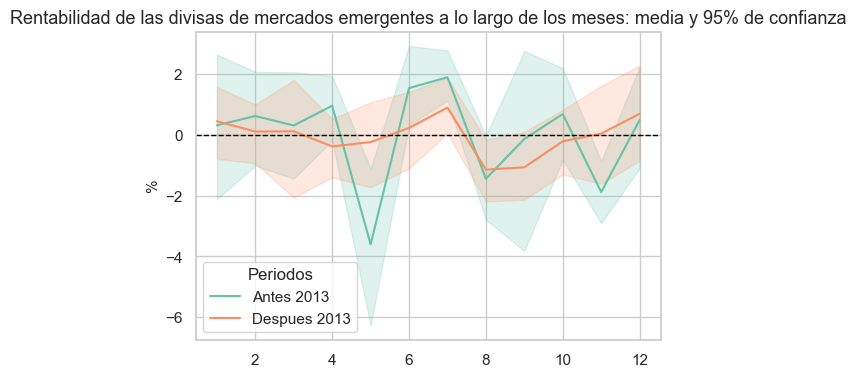

In [24]:
#Rentabilidad mensual de divisas
# Configurar monedas e indicador
xcat_sel = 'FXXR_NSA'
cids_sel = ['JPY', 'MXN', 'ZAR']

# Filtrar datos relevantes
filt1 = df['xcat'] == xcat_sel
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')

dfx = df[filt1 & filt2 & filt3]

# Agrupar por mes calendario y sumar para obtener rentabilidad mensual
dfm = (
    dfx.groupby(['cid', 'xcat'])
    .resample('ME', on='real_date')
    .sum()['value']
    .reset_index()
)

# Pivotar para facilitar manipulación
dfw = dfm.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

# Crear columna con mes calendario y periodo (antes/después 2013)
dfw['month'] = dfw['real_date'].dt.month
dfw['period'] = 'Antes 2013'
dfw.loc[dfw['real_date'].dt.year > 2013, 'period'] = 'Despues 2013'

# Graficar
colors = 'Set2'
sns.set_theme(style='whitegrid', rc={'figure.figsize': (6, 4)})
ax = sns.lineplot(data=dfw, x='month', y=xcat_sel, hue='period',
                  estimator='mean', errorbar=('ci', 95), palette=colors)

plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('Rentabilidad de las divisas de mercados emergentes a lo largo de los meses: media y 95% de confianza', fontsize=13)
plt.xlabel('')
plt.ylabel('%', fontsize=11)
leg = ax.axes.get_legend()
leg.set_title('Periodos')

plt.show()


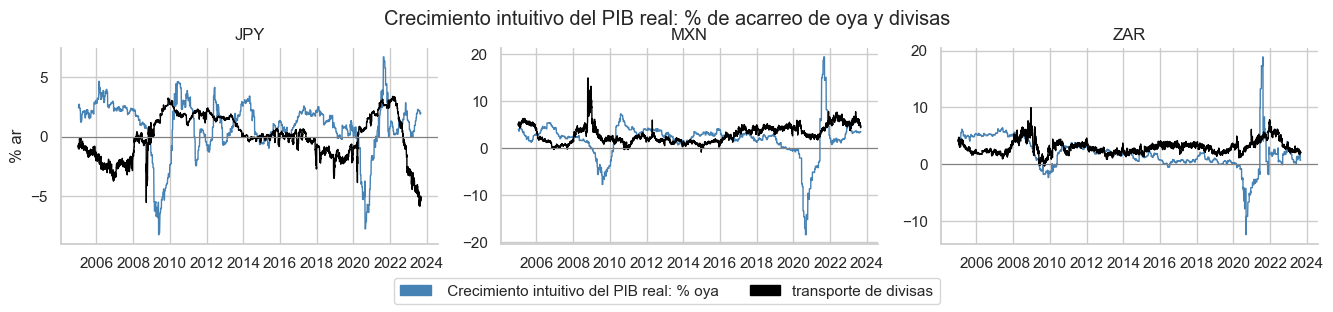

In [25]:
#Crecimiento intuitivo del PIB real  & Carry Real
import matplotlib as mpl

xcats_sel = ['INTRGDP_NSA_P1M1ML12_3MMA', 'FXCRR_NSA']
cids_sel = ['JPY', 'MXN', 'ZAR']

filt1 = df['xcat'].isin(xcats_sel)
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2005-01-01')
dfx = df[filt1 & filt2 & filt3]

colors = ['steelblue', 'black']
sns.set_theme(style='whitegrid', palette=colors)

fg = sns.FacetGrid(
    dfx, col='cid', col_wrap=3,
    palette=colors, hue='xcat', hue_order=xcats_sel,
    height=3, aspect=1.5,
    sharey=False
)

fg.map_dataframe(sns.lineplot, x='real_date', y='value', errorbar=None, lw=1)
fg.map(plt.axhline, y=0, c=".5", lw=0.75)

fg.set_axis_labels('', '% ar')
fg.set_titles(col_template='{col_name}')
fg.fig.suptitle('Crecimiento intuitivo del PIB real: % de acarreo de oya y divisas', y=1)

name_to_color = {
    ' Crecimiento intuitivo del PIB real: % oya': colors[0],
    'transporte de divisas': colors[1]
}
patches = [mpl.patches.Patch(color=v, label=k) for k, v in name_to_color.items()]
labels = name_to_color.keys()
fg.fig.legend(handles=patches, labels=labels, loc='lower center', ncol=2)

plt.show()


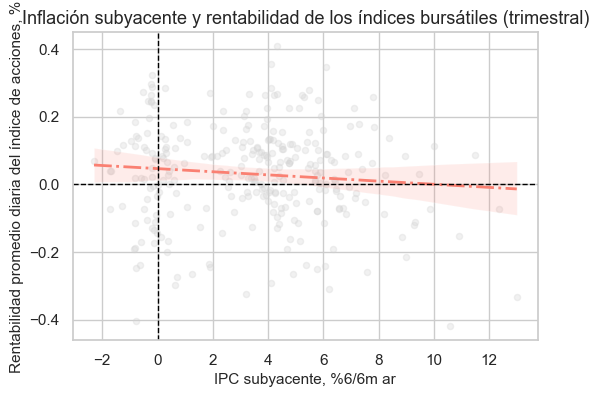

In [28]:
#forecast inflación subyacente y la rentabilidad
xcats_sel = ['CPIH_SA_P1M1ML12', 'EQXR_NSA']
cids_sel = ['JPY', 'MXN', 'ZAR']

filt1 = df['xcat'].isin(xcats_sel)
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2000-01-01')
dfx = df[filt1 & filt2 & filt3]

dfx = dfx[['cid', 'xcat', 'real_date', 'value']]

dfx = dfx.set_index('real_date')  
dfr = dfx.groupby(['cid', 'xcat']).resample('QE-DEC').mean().reset_index()

dfw = dfr.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid', rc={'figure.figsize': (6, 4)})
sns.regplot(
    x=xcats_sel[0], y=xcats_sel[1], data=dfw, ci=98, order=1,
    scatter_kws={'s': 20, 'alpha': 0.3, 'color': 'lightgray'},
    line_kws={'lw': 2, 'linestyle': '-.', 'color': 'salmon'}
)

plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.axvline(x=0, color='black', linestyle='--', lw=1)

plt.title('Inflación subyacente y rentabilidad de los índices bursátiles (trimestral)', fontsize=13)
plt.xlabel('IPC subyacente, %6/6m ar', fontsize=11)
plt.ylabel('Rentabilidad promedio diaria del índice de acciones, %', fontsize=11)
plt.show()

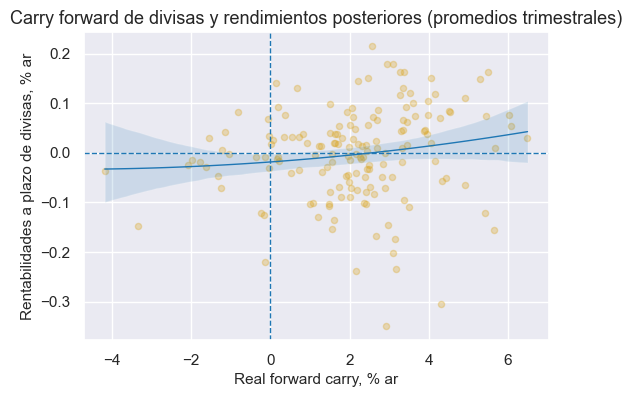

In [36]:
# Carry forward de divisas y rendimientos posteriores (promedios trimestrales)
xcats_sel = ['FXCRR_NSA', 'FXXR_NSA']

filt1 = df['xcat'].isin(xcats_sel)
filt2 = df['cid'].isin(cids_sel)  # Asegúrate de que cids_sel esté definido
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')

dfx = df[filt1 & filt2 & filt3][['cid', 'xcat', 'real_date', 'value']].copy()
dfx['value'] = pd.to_numeric(dfx['value'], errors='coerce')
dfx.dropna(subset=['value'], inplace=True)

dfx.set_index('real_date', inplace=True)

dff = (
    dfx.groupby(['cid', 'xcat'])
       .resample('QE')
       .mean()
       .reset_index()
)

filt4 = dff['xcat'] == xcats_sel[0]
dff.loc[filt4, 'value'] = (
    dff[filt4]
    .groupby('cid')['value']
    .shift(1)
)

dfw = dff.pivot(index=['cid', 'real_date'], columns='xcat', values='value').reset_index()

sns.set_theme(style='darkgrid', rc={'figure.figsize': (6, 4)})
sns.regplot(
    x=xcats_sel[0], y=xcats_sel[1], data=dfw, ci=95, order=2,
    scatter_kws={'s': 20, 'alpha': 0.3, 'color': 'goldenrod'},
    line_kws={'lw': 1, 'linestyle': '-', 'color': 'tab:blue'}
)

plt.axhline(y=0, color='tab:blue', linestyle='--', lw=1)
plt.axvline(x=0, color='tab:blue', linestyle='--', lw=1)

plt.title('Carry forward de divisas y rendimientos posteriores (promedios trimestrales)', fontsize=13)
plt.xlabel('Real forward carry, % ar', fontsize=11)
plt.ylabel('Rentabilidades a plazo de divisas, % ar', fontsize=11)

plt.show()

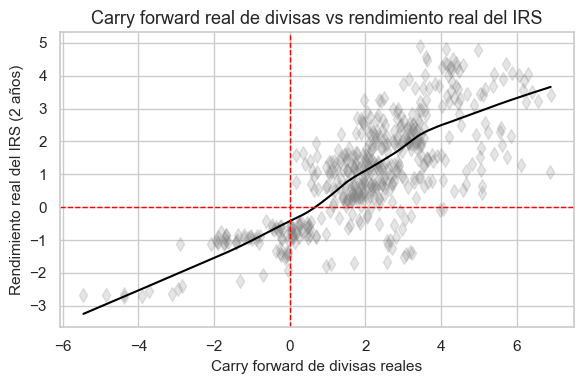

In [86]:
#gráfico que represente el carry forward real de divisas (promedios mensuales) y el rendimiento real del IRS 

# Variables y monedas seleccionadas
cids_sel = ['JPY', 'MXN', 'ZAR']
xcats_sel = ['FXCRR_NSA', 'RYLDIRS02Y_NSA']

# Filtros básicos
filt1 = df['xcat'].isin(xcats_sel)
filt2 = df['cid'].isin(cids_sel)
filt3 = df['real_date'] >= pd.to_datetime('2010-01-01')

# Aplicar filtros
dfx = df[filt1 & filt2 & filt3].copy()
dfx.dropna(subset=['value'], inplace=True)

# Asegurar que 'real_date' sea tipo datetime
dfx['real_date'] = pd.to_datetime(dfx['real_date'])

# Crear una columna con el mes para agrupar
dfx['month'] = dfx['real_date'].dt.to_period('M').dt.to_timestamp()

# Agrupar y calcular promedio mensual
dff = dfx.groupby(['cid', 'xcat', 'month'])['value'].mean().reset_index()

# Reestructurar en formato wide para análisis
dfw = dff.pivot(index=['cid', 'month'], columns='xcat', values='value').reset_index()

# Graficar regresión LOWESS
sns.set_theme(style='whitegrid', rc={'figure.figsize': (6, 4)})
sns.regplot(
    x='FXCRR_NSA',
    y='RYLDIRS02Y_NSA',
    data=dfw,
    lowess=True,
    marker='d',
    scatter_kws={'s': 50, 'alpha': 0.2, 'color': 'gray'},
    line_kws={'lw': 1.5, 'color': 'black'}
)

# Líneas de referencia
plt.axhline(y=0, color='red', linestyle='--', lw=1)
plt.axvline(x=0, color='red', linestyle='--', lw=1)

# Título y etiquetas
plt.title('Carry forward real de divisas vs rendimiento real del IRS', fontsize=13)
plt.xlabel('Carry forward de divisas reales', fontsize=11)
plt.ylabel('Rendimiento real del IRS (2 años)', fontsize=11)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/var/folders/vm/x2yq41wd5zd3kqk2xbyn1jmm0000gn/T/ipykernel_4651/3634243189.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfem

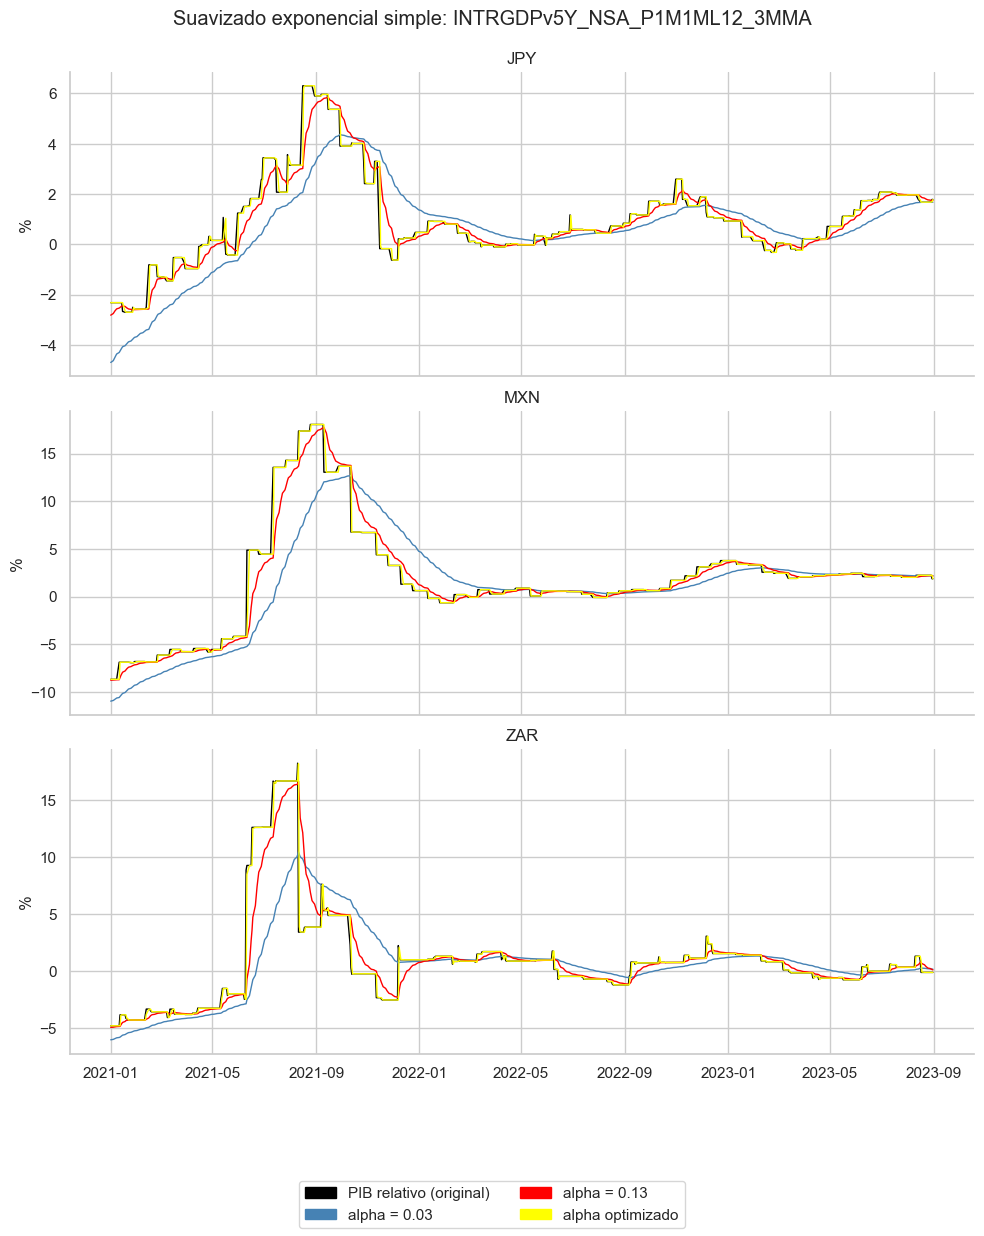

In [87]:
#gráfico que muestre el Suavizado Exponencial Simple en tres modelos

# Cargar datos
df = pd.read_csv("JPMaQS_Quantamental_Indicators.csv")
df["real_date"] = pd.to_datetime(df["real_date"])

# Parámetros
alpha_003 = 0.03
alpha_013 = 0.13
cids_sel = ['JPY', 'MXN', 'ZAR']
xcat_sel = "INTRGDPv5Y_NSA_P1M1ML12_3MMA"

# Filtro de datos
dfx = df[
    (df["xcat"] == xcat_sel) &
    (df["cid"].isin(cids_sel)) &
    (df["real_date"] >= pd.to_datetime("2002-01-01"))
].copy()

# Pivot table para suavizado
dfw = dfx.pivot(index="real_date", columns="cid", values="value").replace(0, np.nan)

# Calcular suavizados
dfema = pd.DataFrame(columns=["cid", "xcat", "real_date", "value"])
for cid in cids_sel:
    serie = dfw[cid].dropna()

    ema003 = SimpleExpSmoothing(serie, initialization_method="heuristic").fit(
        smoothing_level=alpha_003, optimized=False)
    ema013 = SimpleExpSmoothing(serie, initialization_method="heuristic").fit(
        smoothing_level=alpha_013, optimized=False)
    emaop = SimpleExpSmoothing(serie, initialization_method="estimated").fit()

    df003 = ema003.fittedvalues.to_frame(name="value").reset_index()
    df003["xcat"] = xcat_sel + "_EMA003"

    df013 = ema013.fittedvalues.to_frame(name="value").reset_index()
    df013["xcat"] = xcat_sel + "_EMA013"

    dfop = emaop.fittedvalues.to_frame(name="value").reset_index()
    dfop["xcat"] = xcat_sel + "_EMAOP"

    dfc = pd.concat([df003, df013, dfop])
    dfc["cid"] = cid
    dfc = dfc[["cid", "xcat", "real_date", "value"]]
    dfema = pd.concat([dfema, dfc], ignore_index=True)

# Agregar original
dfx["xcat"] = xcat_sel
dfema = pd.concat([dfema, dfx[["cid", "xcat", "real_date", "value"]]], ignore_index=True)

# Recorte para graficar
dfemx = dfema[dfema["real_date"] >= pd.to_datetime("2021-01-01")]

# Gráfico
xcats_ema = [xcat_sel + x for x in ["", "_EMA003", "_EMA013", "_EMAOP"]]
colors = ["black", "steelblue", "red", "yellow"]

sns.set_theme(style="whitegrid", palette=colors)
fg = sns.FacetGrid(
    dfemx, col="cid", col_wrap=1, hue="xcat", hue_order=xcats_ema,
    height=4, aspect=2.5, sharey=False,
)

fg.map(sns.lineplot, "real_date", "value", lw=1)
fg.set_axis_labels("", "%")
fg.set_titles(col_template="{col_name}")
fg.fig.suptitle(f"Suavizado exponencial simple: {xcat_sel}", y=1.02)

# Leyenda
patches = [
    mpatches.Patch(color=colors[0], label="PIB relativo (original)"),
    mpatches.Patch(color=colors[1], label=f"alpha = {alpha_003}"),
    mpatches.Patch(color=colors[2], label=f"alpha = {alpha_013}"),
    mpatches.Patch(color=colors[3], label="alpha optimizado"),
]
fg.fig.legend(handles=patches, loc="lower center", ncol=2)
fg.fig.subplots_adjust(bottom=0.15)
plt.show()